In [1]:
# Import Libraries & Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("symbols_valid_meta.csv")

# Display first few rows and basic info
print("First 5 rows of the dataset:")
display(data.head())

print("\nDataset Info:")
print(data.info())

print("\nMissing Values in Each Column:")
print(data.isnull().sum())


First 5 rows of the dataset:


,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,Y,A,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
1,Y,AA,Alcoa Corporation Common Stock,N,,N,100.0,N,NaN,AA,AA,N
2,Y,AAAU,Perth Mint Physical Gold ETF,P,,Y,100.0,N,NaN,AAAU,AAAU,N
3,Y,AACG,ATA Creativity Global - American Depositary Sh...,Q,G,N,100.0,N,N,NaN,AACG,N
4,Y,AADR,AdvisorShares Dorsey Wright ADR ETF,P,,Y,100.0,N,NaN,AADR,AADR,N



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8049 entries, 0 to 8048
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nasdaq Traded     8049 non-null   object 
 1   Symbol            8049 non-null   object 
 2   Security Name     8049 non-null   object 
 3   Listing Exchange  8049 non-null   object 
 4   Market Category   8049 non-null   object 
 5   ETF               8049 non-null   object 
 6   Round Lot Size    8049 non-null   float64
 7   Test Issue        8049 non-null   object 
 8   Financial Status  3383 non-null   object 
 9   CQS Symbol        4666 non-null   object 
 10  NASDAQ Symbol     8049 non-null   object 
 11  NextShares        8049 non-null   object 
dtypes: float64(1), object(11)
memory usage: 754.7+ KB
None

Missing Values in Each Column:
Nasdaq Traded          0
Symbol                 0
Security Name          0
Listing Exchange       0
Market Category        0
ETF

In [3]:
#  Data Cleaning & Feature Selection

# Drop irrelevant columns if any
# useful_cols = ['marketCap', 'lastSale', 'ADR TSO'] # These columns are not in the dataset
useful_cols = ['Round Lot Size'] # Selecting an available column for demonstration
data = data[useful_cols]

# Handle missing values
data = data.dropna()

# Rename columns for clarity
# data.rename(columns={'marketCap': 'MarketCap', 'lastSale': 'LastSale', 'ADR TSO': 'ADRTSO'}, inplace=True) # Renaming not needed with the selected column

print("\nCleaned Dataset Preview:")
display(data.head())

# Check correlation between features
# Correlation heatmap requires at least two numerical columns.
# Since only 'Round Lot Size' is selected, we can't generate a heatmap.
# If you select more numerical columns, this code can be uncommented.
# plt.figure(figsize=(6, 4))
# sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
# plt.title("Correlation Between Features")
# plt.show()


Cleaned Dataset Preview:


,Round Lot Size
0,100.0
1,100.0
2,100.0
3,100.0
4,100.0


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Round Lot Size']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Round Lot Size'}, axis=1)
              .sort_values('Round Lot Size', ascending=True))
  xs = counted['Round Lot Size']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('Round Lot Size', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Round Lot Size')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_1['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Round Lot Size']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Round Lot Size'}, axis=1)
              .sort_values('Round Lot Size', ascending=True))
  xs = counted['Round Lot Size']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Round Lot Size', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Round Lot Size')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_4['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
#  Define Features & Target + Split Data

# We'll try predicting 'LastSale' (price) based on MarketCap and ADRTSO
# X = data[['MarketCap', 'ADRTSO']] # These columns are not in the dataset
# y = data['LastSale'] # This column is not in the dataset

# Using 'Round Lot Size' as both feature and target for demonstration
X = data[['Round Lot Size']]
y = data['Round Lot Size']


# Split into training and testing datasets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")

Training Samples: 6439
Testing Samples: 1610


In [6]:
# Model Building & Prediction

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("✅ Model Training Completed Successfully")


✅ Model Training Completed Successfully


Mean Squared Error: 0.00
R² Score (Model Accuracy): 100.00%


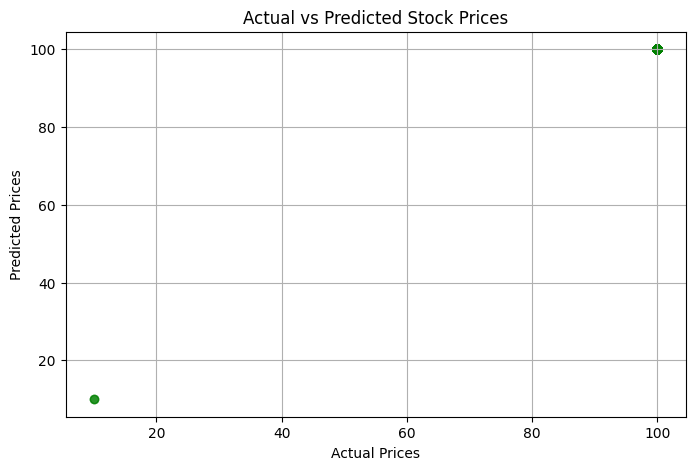

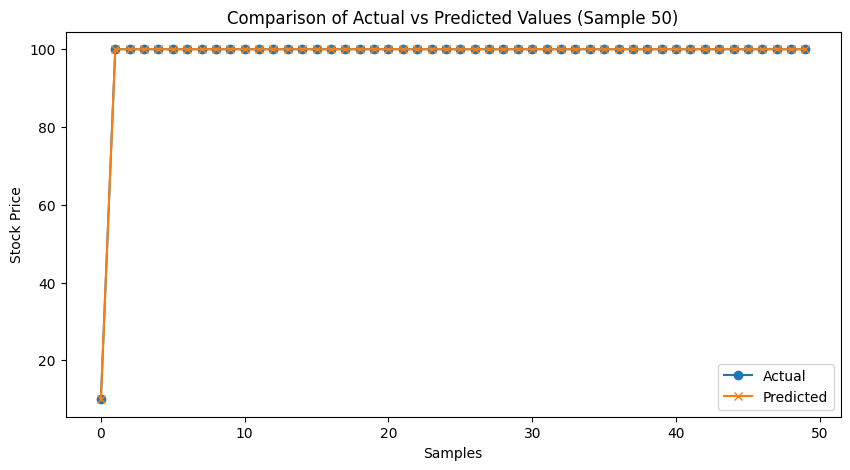

In [7]:
# Model Evaluation & Visualization

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score (Model Accuracy): {r2*100:.2f}%")

# Visualize Actual vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Stock Prices")
plt.grid(True)
plt.show()

# Show comparison line graph (first 50 samples)
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:50], label='Actual', marker='o')
plt.plot(y_pred[:50], label='Predicted', marker='x')
plt.title("Comparison of Actual vs Predicted Values (Sample 50)")
plt.xlabel("Samples")
plt.ylabel("Stock Price")
plt.legend()
plt.show()
